In [16]:
import pandas as pd

# Load your data into a pandas DataFrame
customer_data = pd.read_csv('Segmentation_Data.csv')

# Print column names to verify
print(customer_data.columns)


Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')


   Age  Sex  Marital status  Education  Income  Occupation  Settlement size
0   67    0               0          2  124670           1                2
1   22    1               1          1  150773           1                2
2   49    0               0          1   89210           0                0
3   45    0               0          1  171565           1                1
4   53    0               0          1  149031           1                1


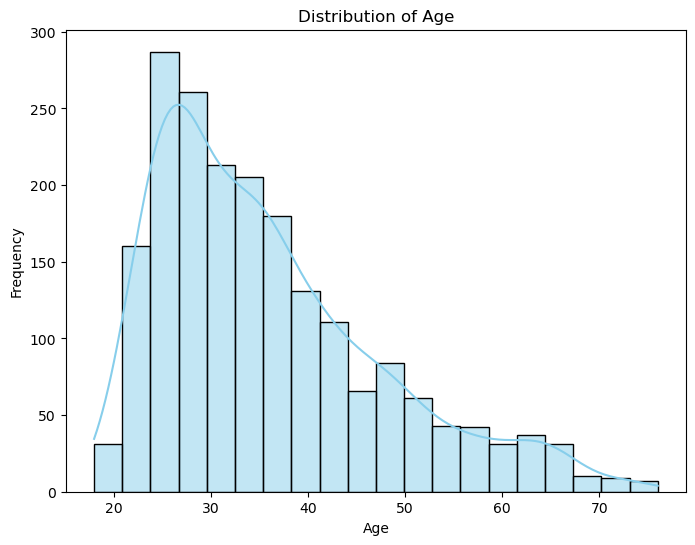

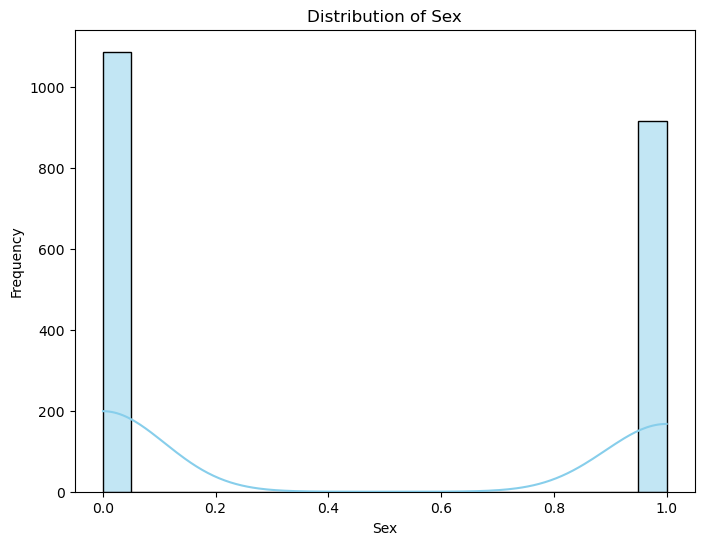

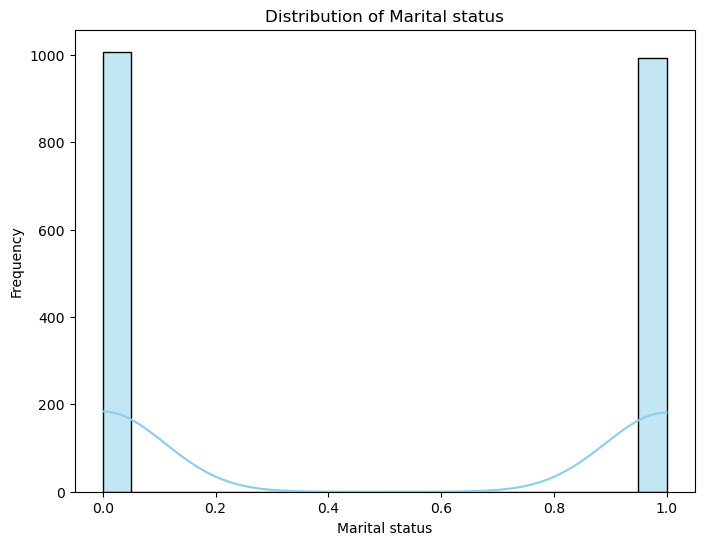

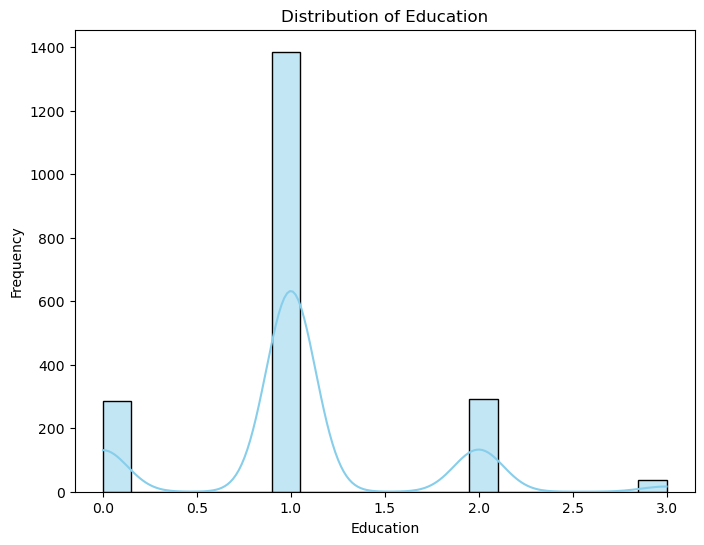

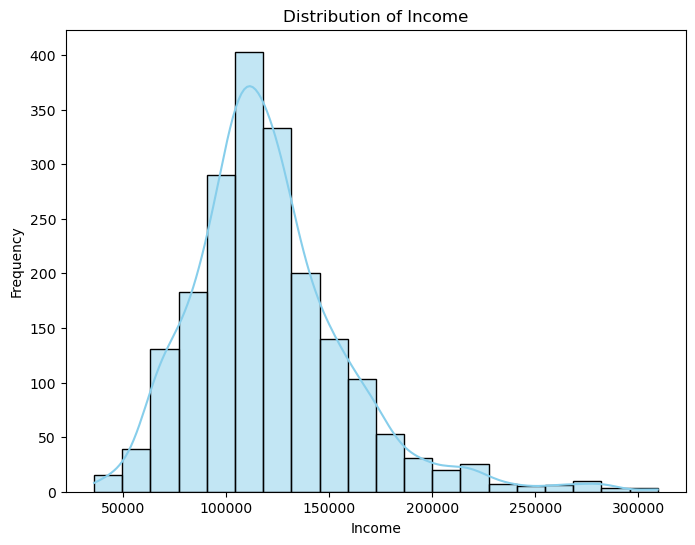

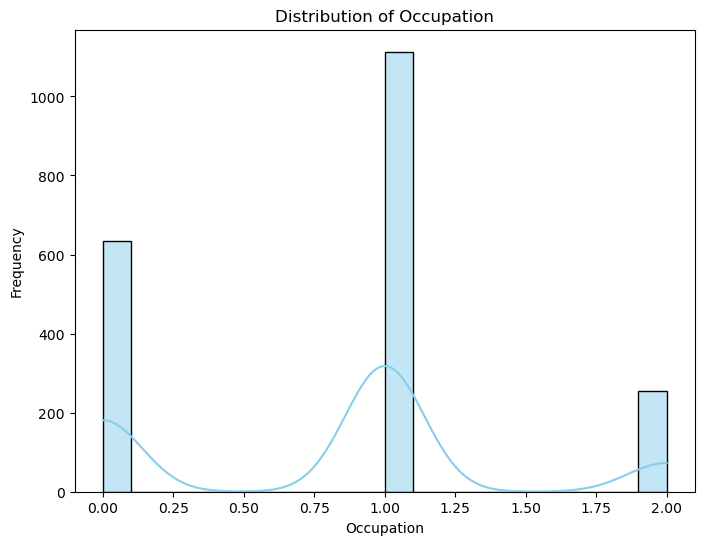

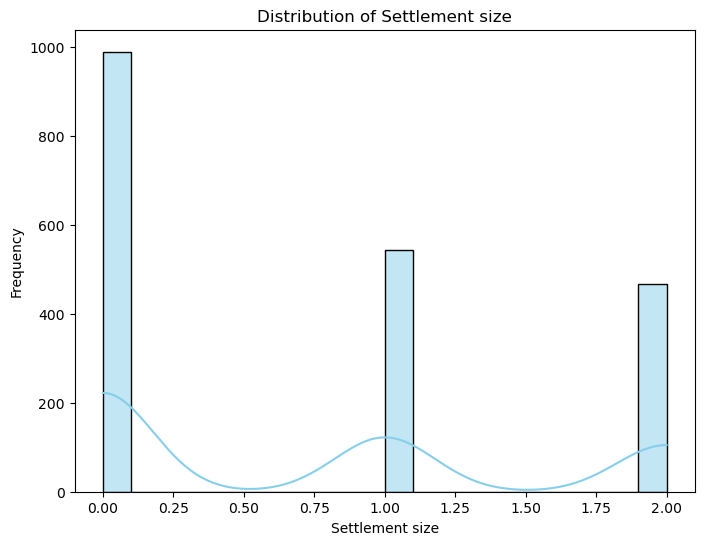

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

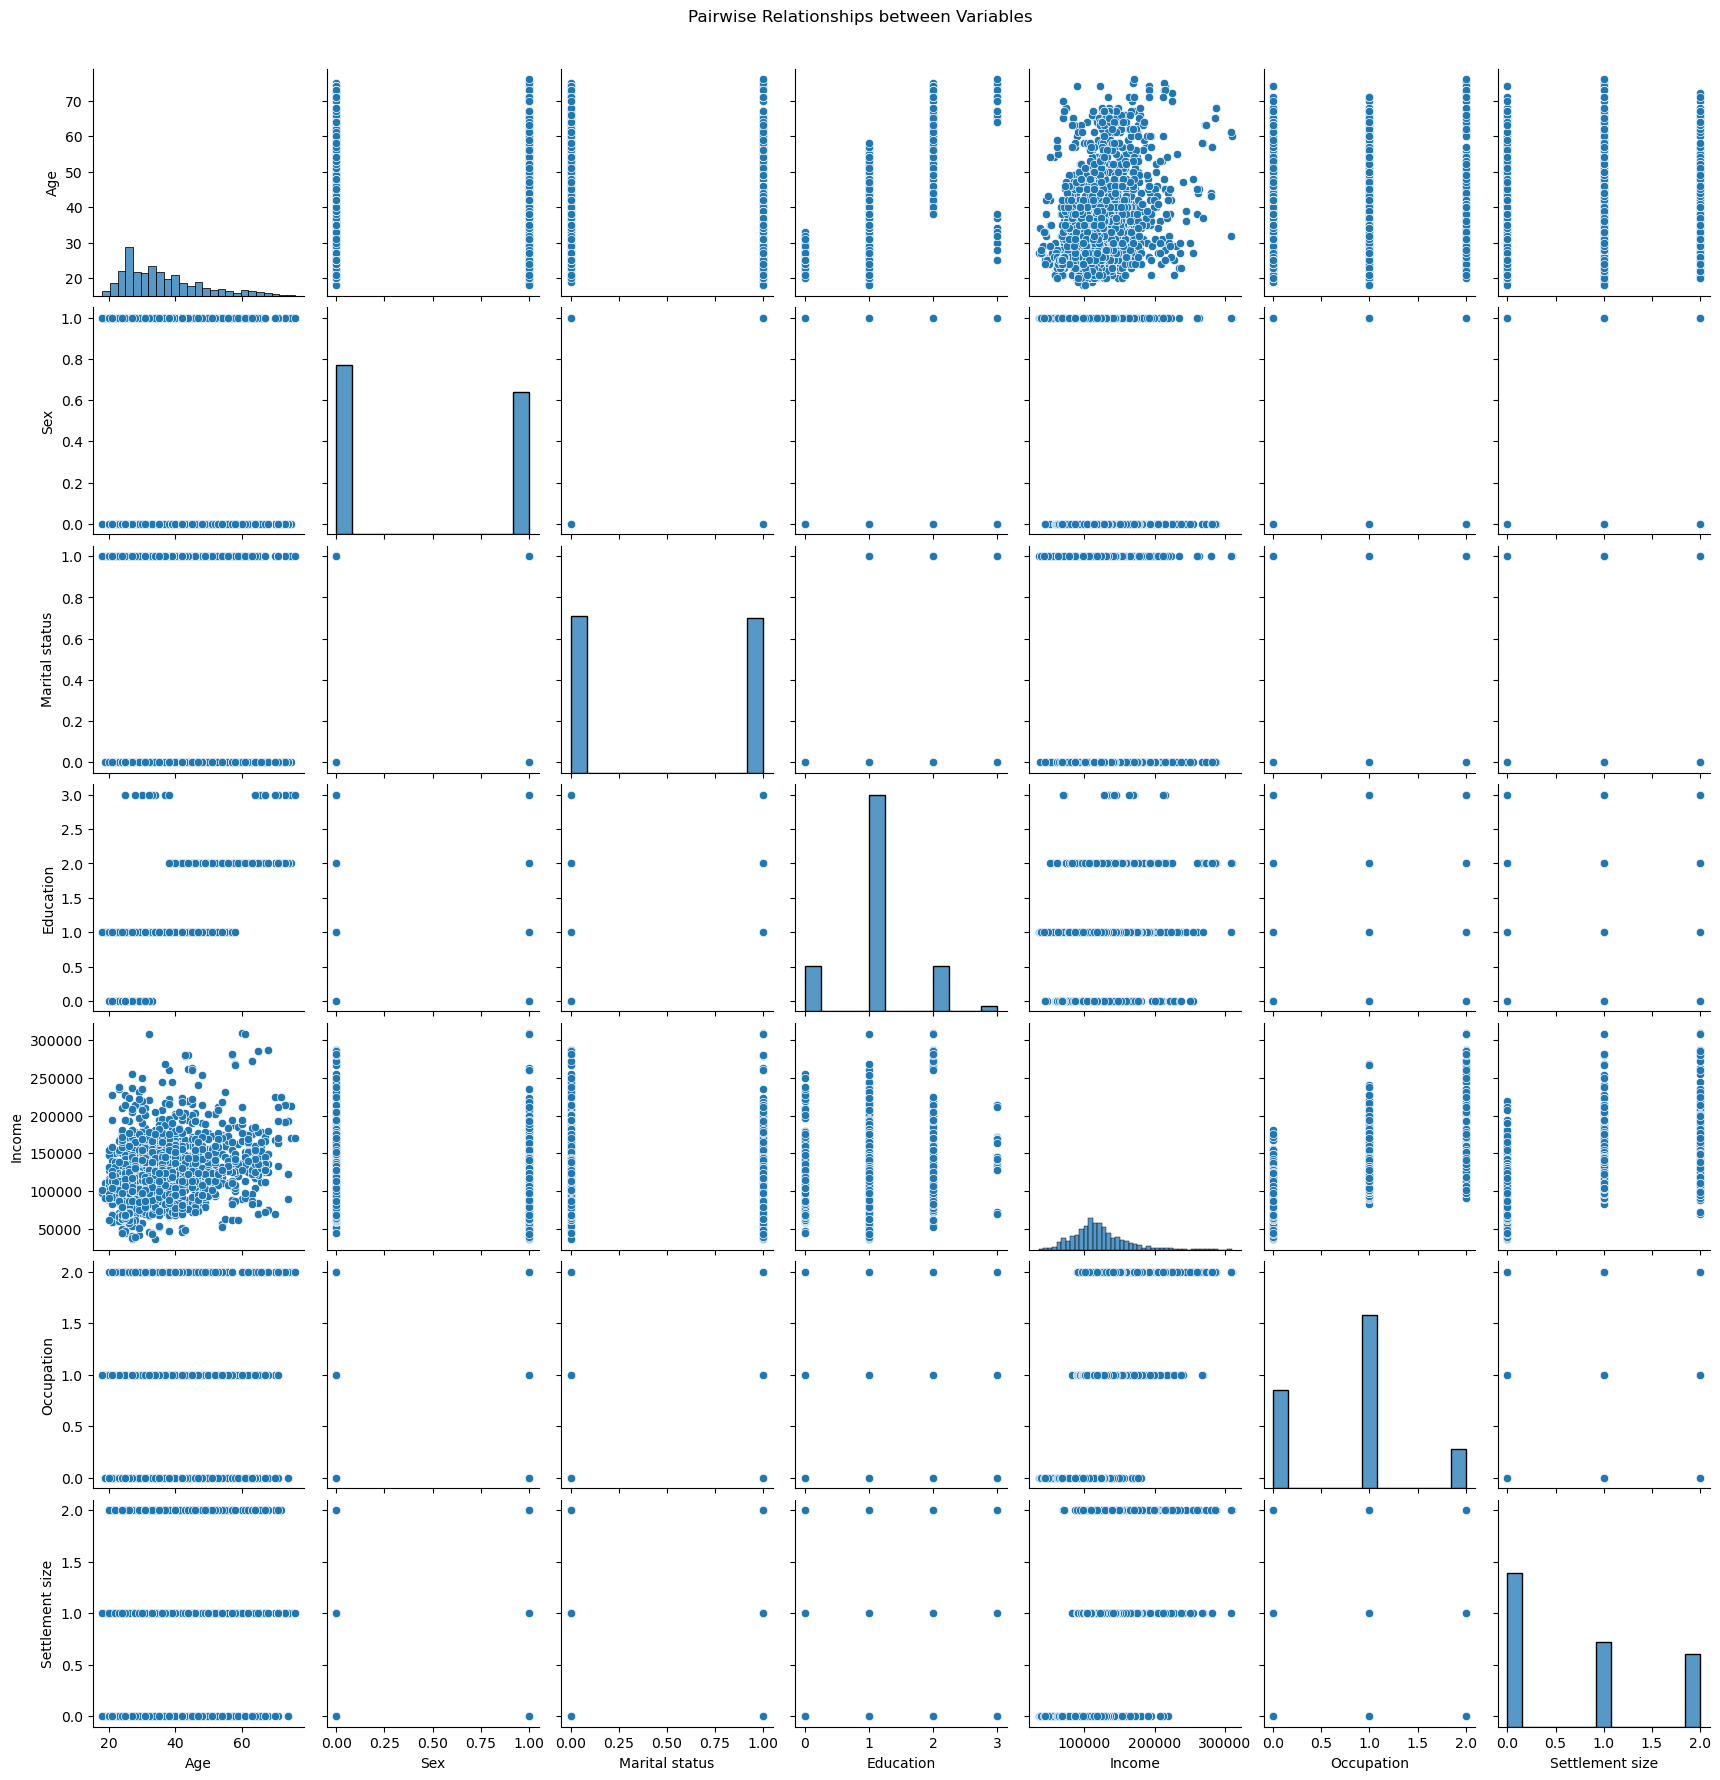

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a pandas DataFrame
customer_data = pd.read_csv('Segmentation_Data.csv')

# Remove duplicates
customer_data = customer_data.drop_duplicates()

# Remove missing values or errors
customer_data = customer_data.dropna()

# Decide which variables are relevant for segmentation
relevant_variables = ['Age', 'Sex', 'Marital status', 'Education', 'Income', 'Occupation', 'Settlement size']

# Select relevant columns from the DataFrame
segmentation_data = customer_data[relevant_variables].copy()

# Display the first few rows of segmentation_data to verify
print(segmentation_data.head())

# Data Visualization
def visualize_distribution(data, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Visualize distribution of each relevant variable
for column in segmentation_data.columns:
    visualize_distribution(segmentation_data, column)

# Visualize pairwise relationships between variables
plt.figure(figsize=(10, 8))
sns.pairplot(segmentation_data)
plt.suptitle('Pairwise Relationships between Variables', y=1.02)
plt.show()


2. **Transform and Prepare Data**: 

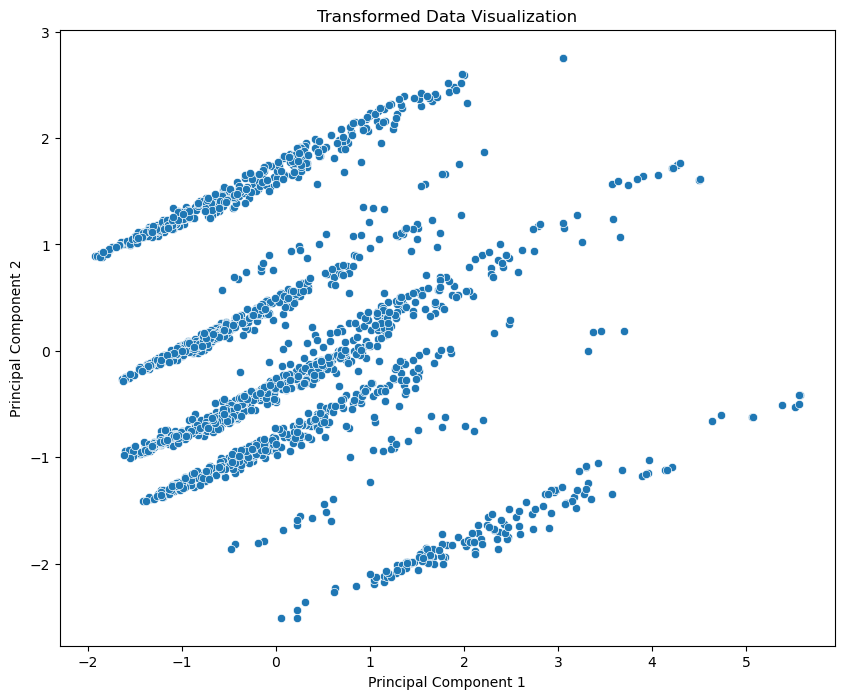

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from feature_engine.encoding import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a pandas DataFrame
customer_data = pd.read_csv('Segmentation_Data.csv')

# Remove duplicates
customer_data = customer_data.drop_duplicates()

# Remove missing values or errors
customer_data = customer_data.dropna()

# Define relevant features for segmentation
relevant_features = ['Age', 'Income', 'Occupation', 'Settlement size']

# Select relevant features
segmentation_data = customer_data[relevant_features].copy()

# Convert specified variables to categorical
segmentation_data[['Occupation', 'Settlement size']] = segmentation_data[['Occupation', 'Settlement size']].astype(str)

# Convert categorical variables into numerical representations
encoder = OrdinalEncoder(encoding_method='arbitrary', variables=['Occupation', 'Settlement size'])
segmentation_data_encoded = encoder.fit_transform(segmentation_data)

# Normalize numerical features
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data_encoded)

# Reduce dimensionality if needed using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
segmentation_data_pca = pca.fit_transform(segmentation_data_scaled)

# Now you have transformed and prepared data stored in 'segmentation_data_pca' DataFrame

# Visualize the transformed data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=segmentation_data_pca[:, 0], y=segmentation_data_pca[:, 1])
plt.title('Transformed Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


3. **Choose a Segmentation Method**:

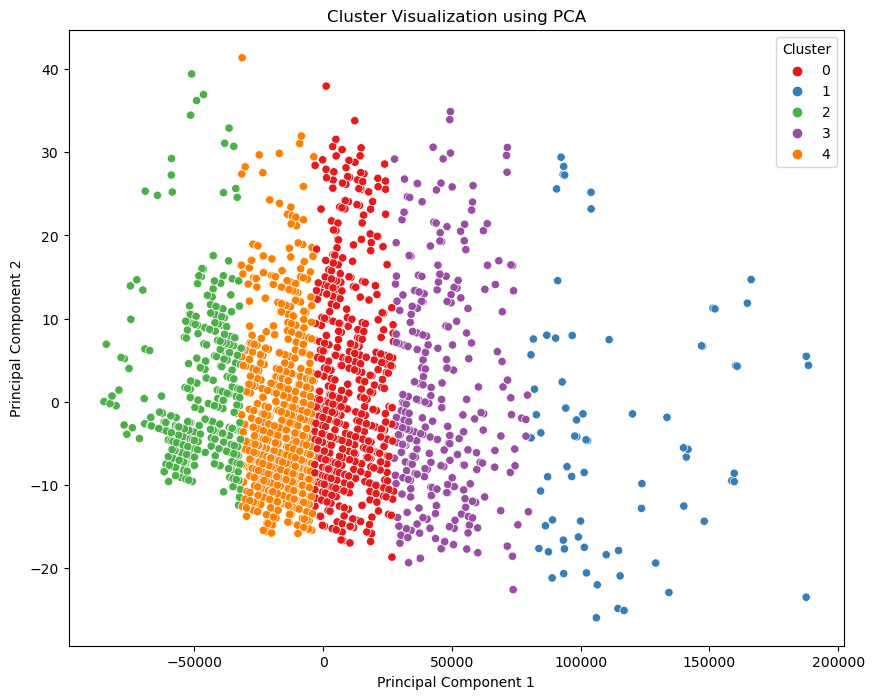

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load your data into a pandas DataFrame
customer_data = pd.read_csv('Segmentation_Data.csv')

# Remove duplicates and missing values
customer_data = customer_data.drop_duplicates().dropna()

# Define relevant features for segmentation
relevant_features = ['Age', 'Income', 'Occupation', 'Settlement size']

# Select relevant features
segmentation_data = customer_data[relevant_features].copy()

# If you have labels or prior knowledge for your segments
if 'segment_label' in customer_data.columns:
    # Supervised segmentation method
    X_train, X_test, y_train, y_test = train_test_split(segmentation_data, customer_data['segment_label'], test_size=0.2, random_state=42)
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    accuracy = classifier.score(X_test, y_test)
    print("Accuracy of the decision tree classifier:", accuracy)
    
    # Visualize the decision tree if needed
    # (Code for visualization not provided as it depends on the specific tree structure)
else:
    # Unsupervised segmentation method
    pca = PCA(n_components=2)
    segmentation_data_pca = pca.fit_transform(segmentation_data)
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(segmentation_data_pca)
    customer_data['cluster'] = clusters
    
    # Visualize the clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=segmentation_data_pca[:, 0], y=segmentation_data_pca[:, 1], hue=clusters, palette='Set1', legend='full')
    plt.title('Cluster Visualization using PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()


4. **Train and Evaluate Models**:

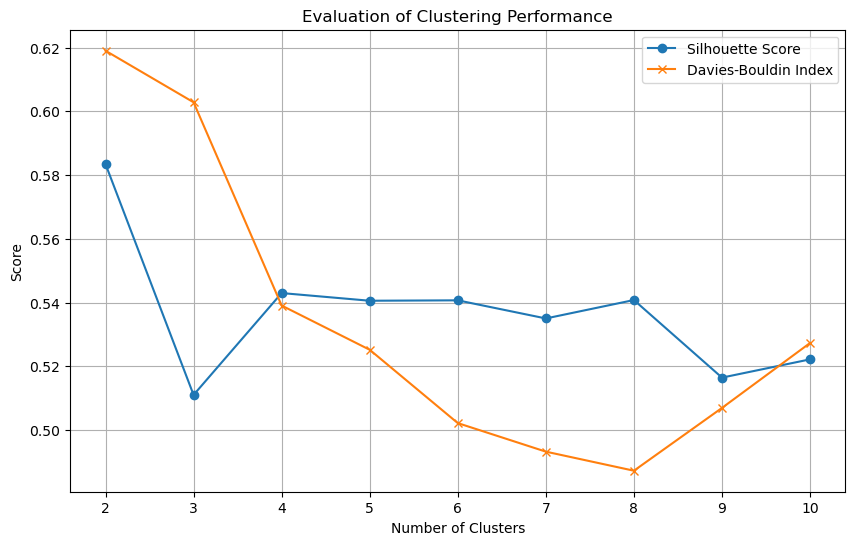

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Assuming you have already prepared your segmentation data in 'segmentation_data' DataFrame

# Initialize and fit K-means clustering model with different number of clusters
silhouette_scores = []
davies_bouldin_scores = []
cluster_range = range(2, 11)

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(segmentation_data)
    silhouette_score_value = silhouette_score(segmentation_data, clusters)
    davies_bouldin_score_value = davies_bouldin_score(segmentation_data, clusters)
    silhouette_scores.append(silhouette_score_value)
    davies_bouldin_scores.append(davies_bouldin_score_value)

# Plot silhouette score and Davies-Bouldin index for different number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(cluster_range, davies_bouldin_scores, marker='x', label='Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Evaluation of Clustering Performance')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans

# Function to update and refine customer segments
def refine_segments(customer_data, segmentation_data, num_clusters):
    # Initialize and fit K-means clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(segmentation_data)
    
    # Update customer segments in the original DataFrame
    customer_data['segment'] = clusters
    
    # Perform analysis on changing patterns in customer data
    # For example, you can analyze trends in segment distribution over time
    
    # Adjust segmentation parameters, features, or methods based on analysis
    # For example, you can try different numbers of clusters or include additional features
    
    # Return updated customer data with segments
    return customer_data

# Example usage:
# Load customer data and segmentation data

segmentation_data = pd.read_csv('segmentation_data.csv')

# Define the number of clusters for segmentation
num_clusters = 5

# Refine and update customer segments
refined_customer_data = refine_segments(customer_data, segmentation_data, num_clusters)
# Display the updated customer data with segments
print(refined_customer_data.head())

# Perform further analysis or actions based on the refined segments
# For example, you can analyze segment characteristics, develop targeted marketing strategies, or personalize customer experiences


          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  cluster  segment  
0                2        0        0  
1                2        3        3  
2                0        4        2  
3                1        3        3  
4                1        3        3  
